<a href="https://www.kaggle.com/venky73/predicting-student-percentage?scriptVersionId=88528867" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

Let's get started(I'm analyzing average student performance)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as snb

In [2]:
df = pd.read_csv('../input/StudentsPerformance.csv')

lets see a sample of 5 records.

In [3]:
df.sample(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
704,female,group B,some high school,free/reduced,completed,59,63,64
754,male,group C,associate's degree,free/reduced,none,58,55,53
820,female,group A,some high school,standard,completed,85,90,92
405,female,group C,some high school,standard,none,63,73,68
508,male,group C,master's degree,standard,none,79,78,77


Based on the sample,
What I understood was, 
1. data frame consists of 8 columns
2. Race/ethnicity column unable to understand. So I should plot later to see whether it influences scores.
3. I would like to rename columns for better understanding and accessing.

In [4]:
#Renaming Columns
df.columns = ['gender', 'race', 'parentDegree', 'lunch', 'course', 'mathScore', 'readingScore', 'writingScore'] 

In [5]:
#Checking whether there are any missing values
df.isna().sum()

gender          0
race            0
parentDegree    0
lunch           0
course          0
mathScore       0
readingScore    0
writingScore    0
dtype: int64

Let me create new column which calculates total percentage of student. I would like to generalize all scores and then see how these features influence scores of students. 
Later using these features let's buiild model and predict the final percentage of students.

In [6]:
#Total Sore Percentage
df['total'] = (df['mathScore']+df['readingScore']+df['writingScore'])/3
df.sample()

,gender,race,parentDegree,lunch,course,mathScore,readingScore,writingScore,total
667,female,group B,bachelor's degree,free/reduced,none,77,85,87,83.0


Let's start analyzing from now.
1. How Race/Group and Parent Degree is related to total scores??

In [7]:
#some stats..

df.groupby(['race','parentDegree']).mean()

mathScore    ...          total
race    parentDegree                     ...               
group A associate's degree  61.000000    ...      63.880952
        bachelor's degree   67.166667    ...      67.861111
        high school         60.444444    ...      61.277778
        master's degree     57.666667    ...      63.333333
        some college        63.888889    ...      64.888889
        some high school    58.916667    ...      59.861111
group B associate's degree  66.097561    ...      67.975610
        bachelor's degree   69.300000    ...      71.300000
        high school         59.791667    ...      61.500000
        master's degree     67.166667    ...      74.833333
        some college        63.189189    ...      64.378378
        some high school    61.815789    ...      64.289474
group C associate's degree  66.730769    ...      69.376068
        bachelor's degree   68.150000    ...      73.241667
        high school         60.906250    ...      62.328125
        master's degree     67.052632    ...      69.035088
        some college        65.130435    ...      67.806763
        some high school    60.551020    ...      63.156463
group D associate's degree  67.600000    ...      69.333333
        bachelor's degree   67.571429    ...      69.869048
        high school         62.863636    ...      63.477273
        master's degree     72.521739    ...      76.478261
        some college        68.731343    ...      70.437811
        some high school    66.760000    ...      68.613333
group E associate's degree  74.897436    ...      73.974359
        bachelor's degree   76.555556    ...      75.592593
        high school         70.772727    ...      69.545455
        master's degree     74.625000    ...      79.083333
        some college        73.828571    ...      72.219048
        some high school    72.111111    ...      69.407407

[30 rows x 4 columns]

**Insight 1:**
As we see, High school, some High school of parentDegree has less scores....
**Insight 2**:
Aso, As group Name is increasing, scores are increasing.
Group A < Group B < Group C < Group D < Group E.


In [8]:
df.groupby(['gender']).mean()

,mathScore,readingScore,writingScore,total
gender,,,,
female,63.633205,72.608108,72.467181,69.569498
male,68.728216,65.473029,63.311203,65.837483


**Insight 3:** As we can see, Female students perform better than Male students.
   Of course, in Maths, Male students outperform Female Students.

Let's see some plots

In [9]:
#relation between gender and course and total
course_gender = df.groupby(['gender','course']).mean().reset_index()

/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


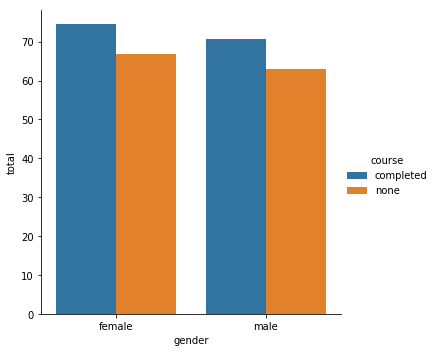

In [10]:
snb.factorplot(x='gender', y='total', hue='course', data=course_gender, kind='bar')

/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


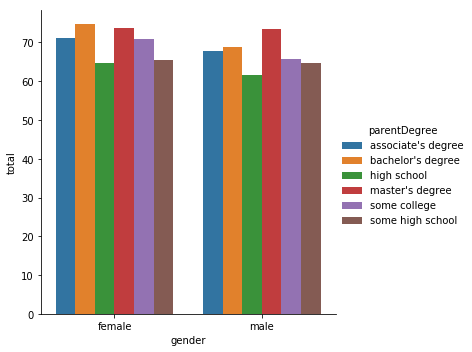

In [11]:
#Now we can observe that,Parents degree is also crucial in student's score. 
course_gender = df.groupby(['gender','parentDegree']).mean().reset_index()
snb.factorplot(x='gender', y='total', hue='parentDegree', data=course_gender, kind='bar')

So, I would like to generalize "parentDegree" column, with 'has_degree' and 'no_degree'.<br>
if parent Degree is in ("high school","some high school") then, I thought they don't have degree. or else they has degree


In [12]:
df.parentDegree.unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [13]:
for i in range(len(df)):
    if df.iloc[i,2] in ['high school', 'some high school']:
        df.iloc[i,2] = 'No_Degree'
    else:
        df.iloc[i,2] = 'has_Degree'
        

In [14]:
df.sample()

,gender,race,parentDegree,lunch,course,mathScore,readingScore,writingScore,total
506,male,group A,No_Degree,standard,none,68,70,66,68.0


Even Lunch affects student's scores

/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


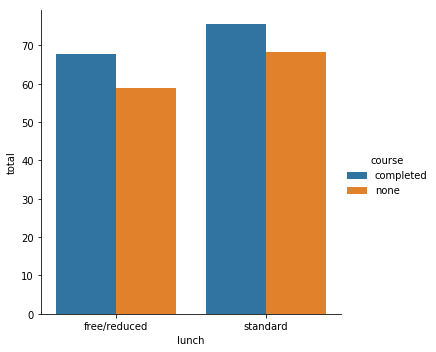

In [15]:
Lunch_course = df.groupby(['lunch','course']).mean().reset_index()
snb.factorplot(x='lunch', y='total', hue='course', data=Lunch_course, kind='bar')

In [16]:
df.parentDegree.value_counts()


has_Degree    625
No_Degree     375
Name: parentDegree, dtype: int64

/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


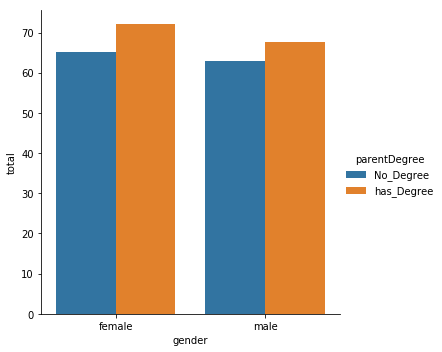

In [17]:
#Now we can observe that,Parents degree is also crucial in student's score. 
course_gender = df.groupby(['gender','parentDegree']).mean().reset_index()
snb.factorplot(x='gender', y='total', hue='parentDegree', data=course_gender, kind='bar')

/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


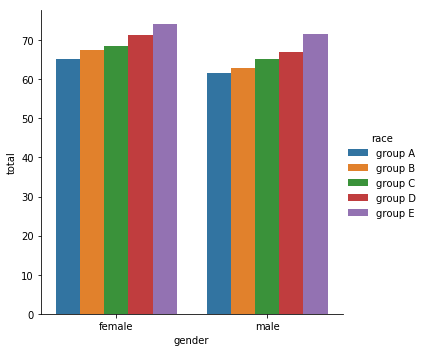

In [18]:
race_gender = df.groupby(['gender','race']).mean().reset_index()
snb.factorplot(x='gender', y='total', hue='race', data=race_gender, kind='bar')

In [19]:
final_df = df.groupby(['gender','parentDegree','course','lunch','race']).mean().reset_index()
after_sort = final_df.sort_values(by= ['total'],ascending = False)
after_sort.drop(columns=['mathScore','readingScore','writingScore'],inplace = True)
after_sort

,gender,parentDegree,course,lunch,race,total
28,female,has_Degree,completed,standard,group E,84.023810
5,female,No_Degree,completed,standard,group A,82.666667
66,male,has_Degree,completed,standard,group C,79.980392
27,female,has_Degree,completed,standard,group D,79.738095
65,male,has_Degree,completed,standard,group B,79.100000
26,female,has_Degree,completed,standard,group C,78.342593
64,male,has_Degree,completed,standard,group A,77.761905
8,female,No_Degree,completed,standard,group D,76.566667
25,female,has_Degree,completed,standard,group B,76.555556
23,female,has_Degree,completed,free/reduced,group E,76.400000


As you can see above, I have generalized all features <br>
<ol>
<li>  As you can see, Top students(mean) have completed their course, Took standard Lunch, Having parent_Degree is also + point.</li><li>Bottom students(mean) didn't complete course, Didn't take good lunch, parent has no degree.</li>
<li>Out of Top 10(mean), 7 are female students</li>
<li>Interestingly, Out of Bottom 10(mean), 7 are male students</li></ol>

In [20]:
#See, it's clear
print("Top students Performance \n",after_sort[:10])
#Simply, if you complete course, Have standard lunch, you   can score good grades. 

Top students Performance 
     gender parentDegree     course         lunch     race      total
28  female   has_Degree  completed      standard  group E  84.023810
5   female    No_Degree  completed      standard  group A  82.666667
66    male   has_Degree  completed      standard  group C  79.980392
27  female   has_Degree  completed      standard  group D  79.738095
65    male   has_Degree  completed      standard  group B  79.100000
26  female   has_Degree  completed      standard  group C  78.342593
64    male   has_Degree  completed      standard  group A  77.761905
8   female    No_Degree  completed      standard  group D  76.566667
25  female   has_Degree  completed      standard  group B  76.555556
23  female   has_Degree  completed  free/reduced  group E  76.400000


In [21]:
#See, it's clear
print("Bottom students Performance \n",after_sort[-10:][::-1])
#Simply, Lunch, Course are mandatory for scoring good. 

Bottom students Performance 
     gender parentDegree     course         lunch     race      total
50    male    No_Degree       none  free/reduced  group B  45.333333
40    male    No_Degree  completed  free/reduced  group B  50.333333
12  female    No_Degree       none  free/reduced  group C  50.607843
10  female    No_Degree       none  free/reduced  group A  52.066667
41    male    No_Degree  completed  free/reduced  group C  52.416667
11  female    No_Degree       none  free/reduced  group B  53.066667
53    male    No_Degree       none  free/reduced  group E  54.000000
49    male    No_Degree       none  free/reduced  group A  54.208333
70    male   has_Degree       none  free/reduced  group B  55.500000
54    male    No_Degree       none      standard  group A  56.000000


In [22]:

base = pd.get_dummies(final_df,columns=['gender','race','parentDegree','course','lunch'],dtype = int)
base.sample()
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 17 columns):
mathScore                  79 non-null float64
readingScore               79 non-null float64
writingScore               79 non-null float64
total                      79 non-null float64
gender_female              79 non-null int64
gender_male                79 non-null int64
race_group A               79 non-null int64
race_group B               79 non-null int64
race_group C               79 non-null int64
race_group D               79 non-null int64
race_group E               79 non-null int64
parentDegree_No_Degree     79 non-null int64
parentDegree_has_Degree    79 non-null int64
course_completed           79 non-null int64
course_none                79 non-null int64
lunch_free/reduced         79 non-null int64
lunch_standard             79 non-null int64
dtypes: float64(4), int64(13)
memory usage: 10.6 KB


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
train_x,test_x,train_y,test_y = train_test_split(base.iloc[:,4:],base.iloc[:,3],test_size = 0.05)
model = XGBRegressor(max_depth = 6)
model.fit(train_x,train_y)
target = model.predict(test_x)
mean_squared_error(target,test_y)


95.2633841246677

In [24]:
len(target)

4

In [25]:
test_y[:5].values

array([82.66666667, 71.33333333, 61.74509804, 67.59259259])

In [26]:
target[:5]

array([64.32803, 74.56195, 63.97937, 73.00851], dtype=float32)

Finally,
What I observed is ,
1. Students percentage is correlated with Groups Average Percentage.
            ex: Average student from Group E have scored more compared to Group A's average Student.
2. Parents Degree is also a bit correlated.
3. Female Students Percentage is higher than Male Students.
4. Students Who took courses have benefitted.
5. Students who took standard lunch has scored well.

Thanks,
Forget about upvoting, at least you viewed my kernel,thanks.


I am a noobie. I would just like to explore this data, predict student total percentage based on the given features. I'm still editing this kernel. Please let me know if there any suggestions. Any tips/suggestions are highly encouraged. Please tell mistakes that I performed.